### We begin my importing the data from the data folder. 

In [29]:
import numpy as np
from mnist.loader import MNIST

mndata = MNIST('data')
#This will load the train and test data
X_train, y_train = mndata.load('data/emnist-byclass-train-images-idx3-ubyte',
                               'data/emnist-byclass-train-labels-idx1-ubyte')
X_test, y_test = mndata.load('data/emnist-byclass-test-images-idx3-ubyte',
                             'data/emnist-byclass-test-labels-idx1-ubyte')
# Convert data to numpy arrays and normalize images to the interval [0, 1]
X_train = np.array(X_train) / 255.0
y_train = np.array(y_train)
X_test = np.array(X_test) / 255.0
y_test = np.array(y_test)

# Ở đây, x_train, x_test mang các giá trị nguyên từ 0 đến 255, y_train, y_test chứa các kí tự bảng chữ cái và kí tự số thể hiện class của x tương ứng.
# Nếu sử dụng một neural network với softmax layer ở cuối, ta cần chuẩn hoá dữ liệu đầu vào x_train, x_test về đoạn [0, 1] và chuyển y_train, y_test về dạng one-hot coding.


# Getting Data ready for pre-processing

In [5]:
from matplotlib import pyplot as plt

print(X_train.shape)
print(X_test.shape)

(697932, 784)
(116323, 784)
2


In [30]:
X_train = X_train.reshape(X_train.shape[0], 28,28)
X_test = X_test.reshape(X_test.shape[0],28,28)

print(X_train.shape)
print(X_test.shape)
print(np.ndim(X_train))

(697932, 28, 28)
(116323, 28, 28)
3


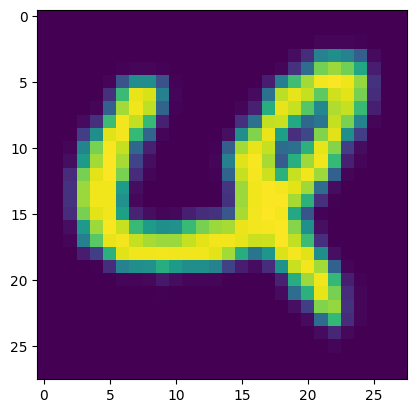

In [ ]:

#Display a random image
plt.imshow(X_train[58])
plt.show()

In [ ]:
#Y'all can see how an image array looks like. all float values b/w 0 and 1
m = X_train[0]
print(m)

### Now we perform Image preprocessing. We reverse and rotate all train and test images

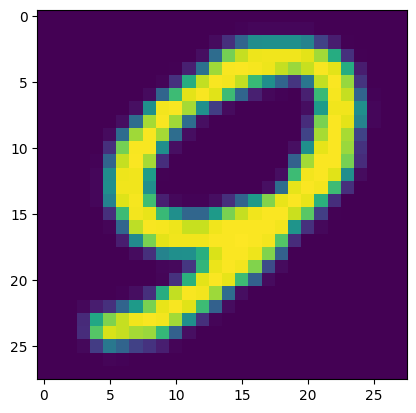

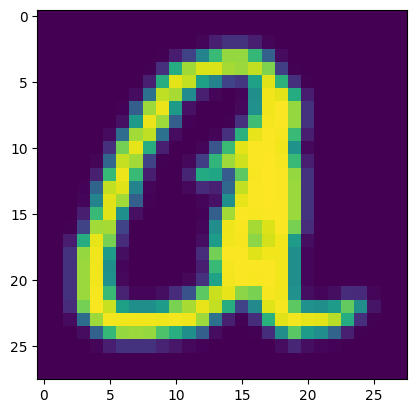

In [31]:
from matplotlib import pyplot as plt
# xoay ảnh
#for train data
for t in range(697931):
    X_train[t]=np.transpose(X_train[t])
    
#checking
plt.imshow(X_train[1000])
plt.show()

#for test data 
for t in range(116322):
    X_test[t]=np.transpose(X_test[t])

#checking
plt.imshow(X_test[1])
plt.show()

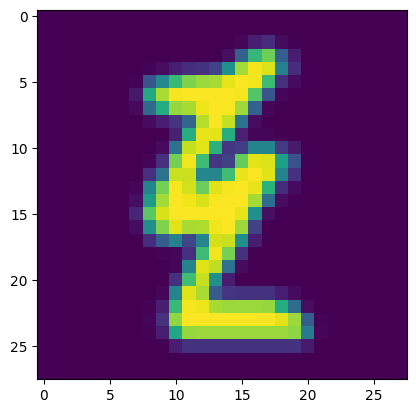

In [ ]:
#Checking the last train image, just to be sure!
m = X_train[697931]
plt.imshow(m)
plt.show()

### Reshaping train and test data again for input into model

In [32]:
X_train = X_train.reshape(X_train.shape[0], 784,1)
X_test = X_test.reshape(X_test.shape[0], 784,1)

print(X_train.shape)
print(X_test.shape)

(697932, 784, 1)
(116323, 784, 1)


### Creation of model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Reshape, LSTM
from keras import backend as K
from keras.constraints import maxnorm

# chuyển sang hình ảnh
def resh(ipar):
    opar = []
    for image in ipar:
        opar.append(image.reshape(-1))
    return np.asarray(opar)

from keras.utils import np_utils

train_images = X_train.astype('float32')
test_images = X_test.astype('float32')

train_images = resh(train_images)
test_images = resh(test_images)

# one hot end code --- đánh giá trị 0 1 cho label, có tổng cộng 62 ký tự chữ và số
train_labels = np_utils.to_categorical(y_train, 62)
test_labels = np_utils.to_categorical(y_test, 62)

print('Dữ liệu y ban đầu ', y_train[0])
print('Dữ liệu y sau one-hot encoding ',test_labels[0])


K.set_learning_phase(1)

# Model = Sequential() để nói cho keras là ta sẽ xếp các layer lên nhau để tạo model. (theo thứ tự)
model = Sequential()

# Phần tử đầu tiên của list thể hiện kết nối giưa input layer và layer tiếp theo, các phần tử tiếp theo của list thể hiện kết nối của các layer tiếp theo.
model.add(Reshape((28,28,1), input_shape=(784,)));

# Các layer cũng có thể được thêm lần lượt vào model bằng cách sử dụng hàm .add().
# Số các convolution layer: càng nhiều các convolution layer thì performance càng được cải thiện. 

#add the layer below for an accuracy of 89%.(Training time - over 20 hours)
#model.add(Convolution2D(32, (5,5), input_shape=(28,28,1),
                             #activation='relu',padding='same', kernel_constraint=));
model.add(Convolution2D(32, (5,5),activation='relu'));

# Lớp pooling thường được sử dụng ngay sau lớp convulational để đơn giản hóa thông tin đầu ra để giảm bớt số lượng neuron.
# Thủ tục pooling phổ biến là max-pooling, thủ tục này chọn giá trị lớn nhất trong vùng đầu vào 2×2. 
# số lượng neuron sẽ giảm 2 lần, Thủ tục pooling phổ biến là max-pooling, thủ tục này chọn giá trị lớn nhất trong vùng đầu vào 2×2.
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64, (5,5),activation='relu'));
model.add(MaxPooling2D(pool_size=(2,2)))



# Lớp pooling thường được sử dụng ngay sau lớp convulational để đơn giản hóa thông tin đầu ra để giảm bớt số lượng neuron.
# Thủ tục pooling phổ biến là max-pooling, thủ tục này chọn giá trị lớn nhất trong vùng đầu vào 2×2. 
# số lượng neuron sẽ giảm 2 lần, Thủ tục pooling phổ biến là max-pooling, thủ tục này chọn giá trị lớn nhất trong vùng đầu vào 2×2.



model.add(Flatten())
# hàm này biến mỗi điểm dữ liểu ở dạng một mảng nhiều chiều thành một mảng một chiều.


#model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)));

#  thể hiện một fully connected layer, tức toàn bộ các unit của layer trước đó được nối với toàn bộ các unit của layer hiện tại.


model.add(Dropout(0.5));

model.add(Dense(62, activation='softmax'));

#opt = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
# opt = optimizers.Adadelta()
opt = optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0);
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy']);

Dữ liệu y ban đầu  35
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Training of model and evaluation

In [34]:
print(model.summary());
history = model.fit(train_images,train_labels,validation_data=(test_images, test_labels), batch_size=128, epochs=1);

# Một Epoch được tính là khi chúng ta đưa tất cả dữ liệu vào mạng neural network 1 lần.

# Batch size là số lượng mẫu dữ liệu trong một batch.
# Khi dữ liệu quá lớn, chúng ta không thể đưa hết mỗi lần tất cả tập dữ liệu vào để huấn luyện được.
# Buộc lòng chúng ta phải chia nhỏ tập dữ liệu ra thành các batch (size nhỏ hơn).


# model.get_weights()


# ở đó, phần tử thứ nhất của list này chính là hệ số tìm được, phẩn tử thứ hai chính là bias. 

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)              

In [35]:
#evaluating model on test data. will take time
scores = model.evaluate(test_images,test_labels, verbose = 0);
print("Accuracy: %.2f%%"%(scores[1]*100));
print(scores)

Accuracy: 85.55%
[0.3933795988559723, 0.8554714322090149]


## Creating model history graphs

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


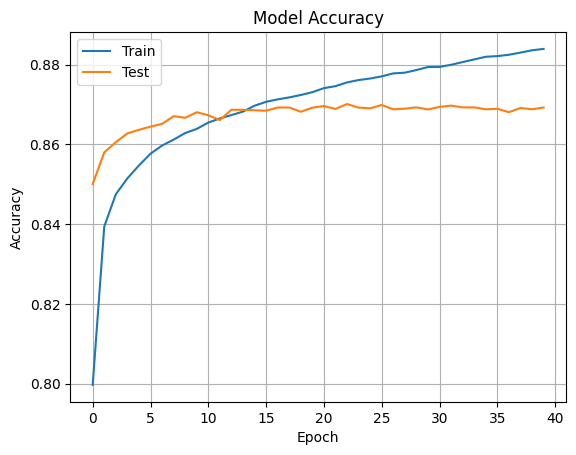

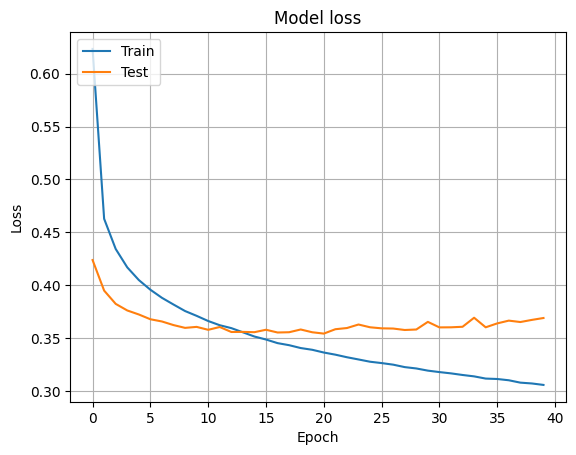

In [ ]:
print(history.history.keys());
# summarize history for accuracy
plt.plot(history.history['accuracy']);
plt.plot(history.history['val_accuracy']);
plt.title('Model Accuracy');
plt.ylabel('Accuracy');
plt.xlabel('Epoch');
plt.legend(['Train', 'Test'], loc='upper left');
plt.grid();
plt.show();
# summarize history for loss
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);
plt.title('Model loss');
plt.ylabel('Loss');
plt.xlabel('Epoch');
plt.legend(['Train', 'Test'], loc='upper left');
plt.grid();
plt.show();

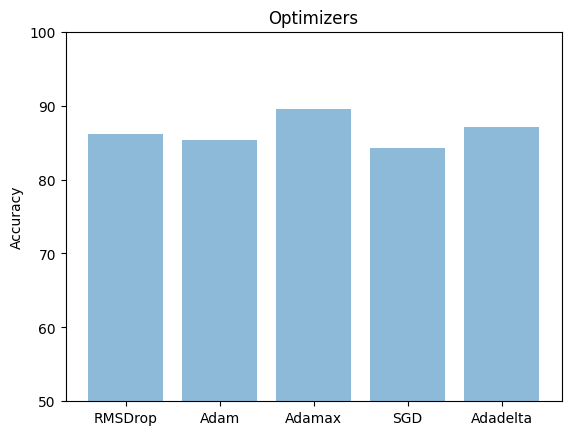

In [ ]:
objects = ('RMSDrop', 'Adam', 'Adamax', 'SGD', 'Adadelta');
y_pos = np.arange(len(objects));
performance = [86.2,85.39,89.53,84.29,87.11];
 
plt.bar(y_pos, performance, align='center', alpha=0.5);
plt.xticks(y_pos, objects);
plt.ylabel('Accuracy');
plt.title('Optimizers');
plt.ylim(50,100);
plt.show();

## Predicting a single image using the model

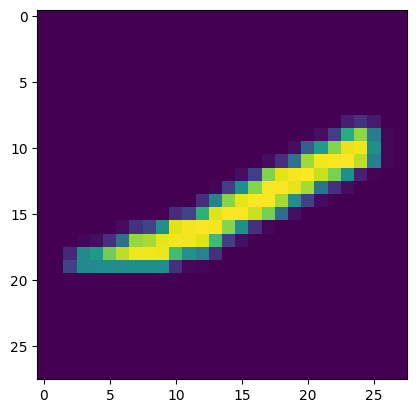

47
prediction: l


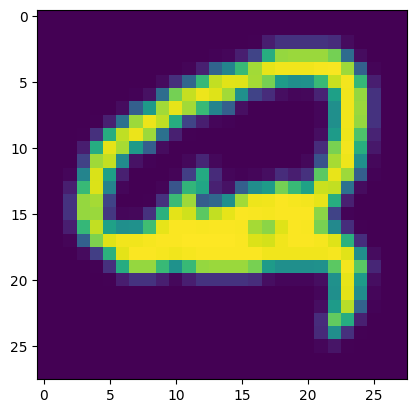

36
prediction: a


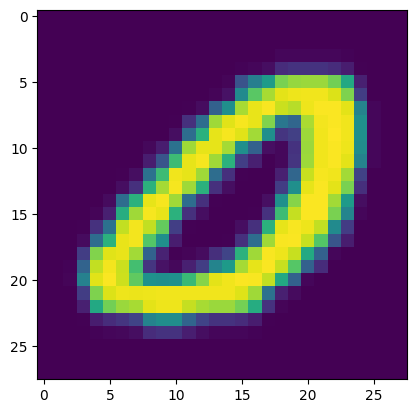

0
prediction: 0


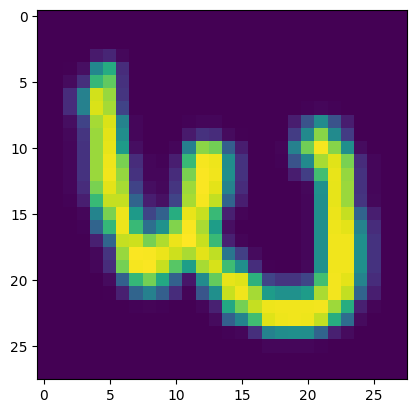

58
prediction: w


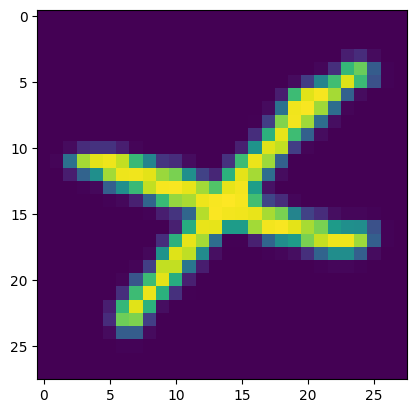

55
prediction: t


In [14]:
characters = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
for i in range(5):
    # pos = 1325
    m = X_test[i].reshape(28,28);
    plt.imshow(m);
    plt.show();

    a = model.predict_classes(X_test[i].reshape(1,784))
    print(a[0])
    print('prediction: '+characters[a[0]]);


In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# in confusion_matrix
Y_pred = model.predict_generator(X_test)
y_pred = np.argmax(Y_pred, axis=1)


ac_score = metrics.accuracy_score(y_test, y_pred)
cl_report = metrics.classification_report(y_test,y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average='macro')
recall_score = metrics.recall_score(y_test, y_pred, average='macro')
precision_score = metrics.precision_score(y_test, y_pred, average='macro')

print("Score: ", ac_score)
print(cl_report)
print('precision_score=', precision_score)
print('f1_score=', f1_score)
print('recall_score=', recall_score)


CM = metrics.confusion_matrix(y_test, y_pred);

print('Confusion Matrix:\n', CM);

Confusion Matrix:
 [[4665    1    0 ...    0    0    0]
 [   0 5684    2 ...    0    0    0]
 [   0    3 5726 ...    0    0   43]
 ...
 [   0    0    3 ...  342    3    1]
 [   0    0    1 ...    1  146    0]
 [   0    0  111 ...    5    1  248]]


In [ ]:
print(CM.shape)

(62, 62)


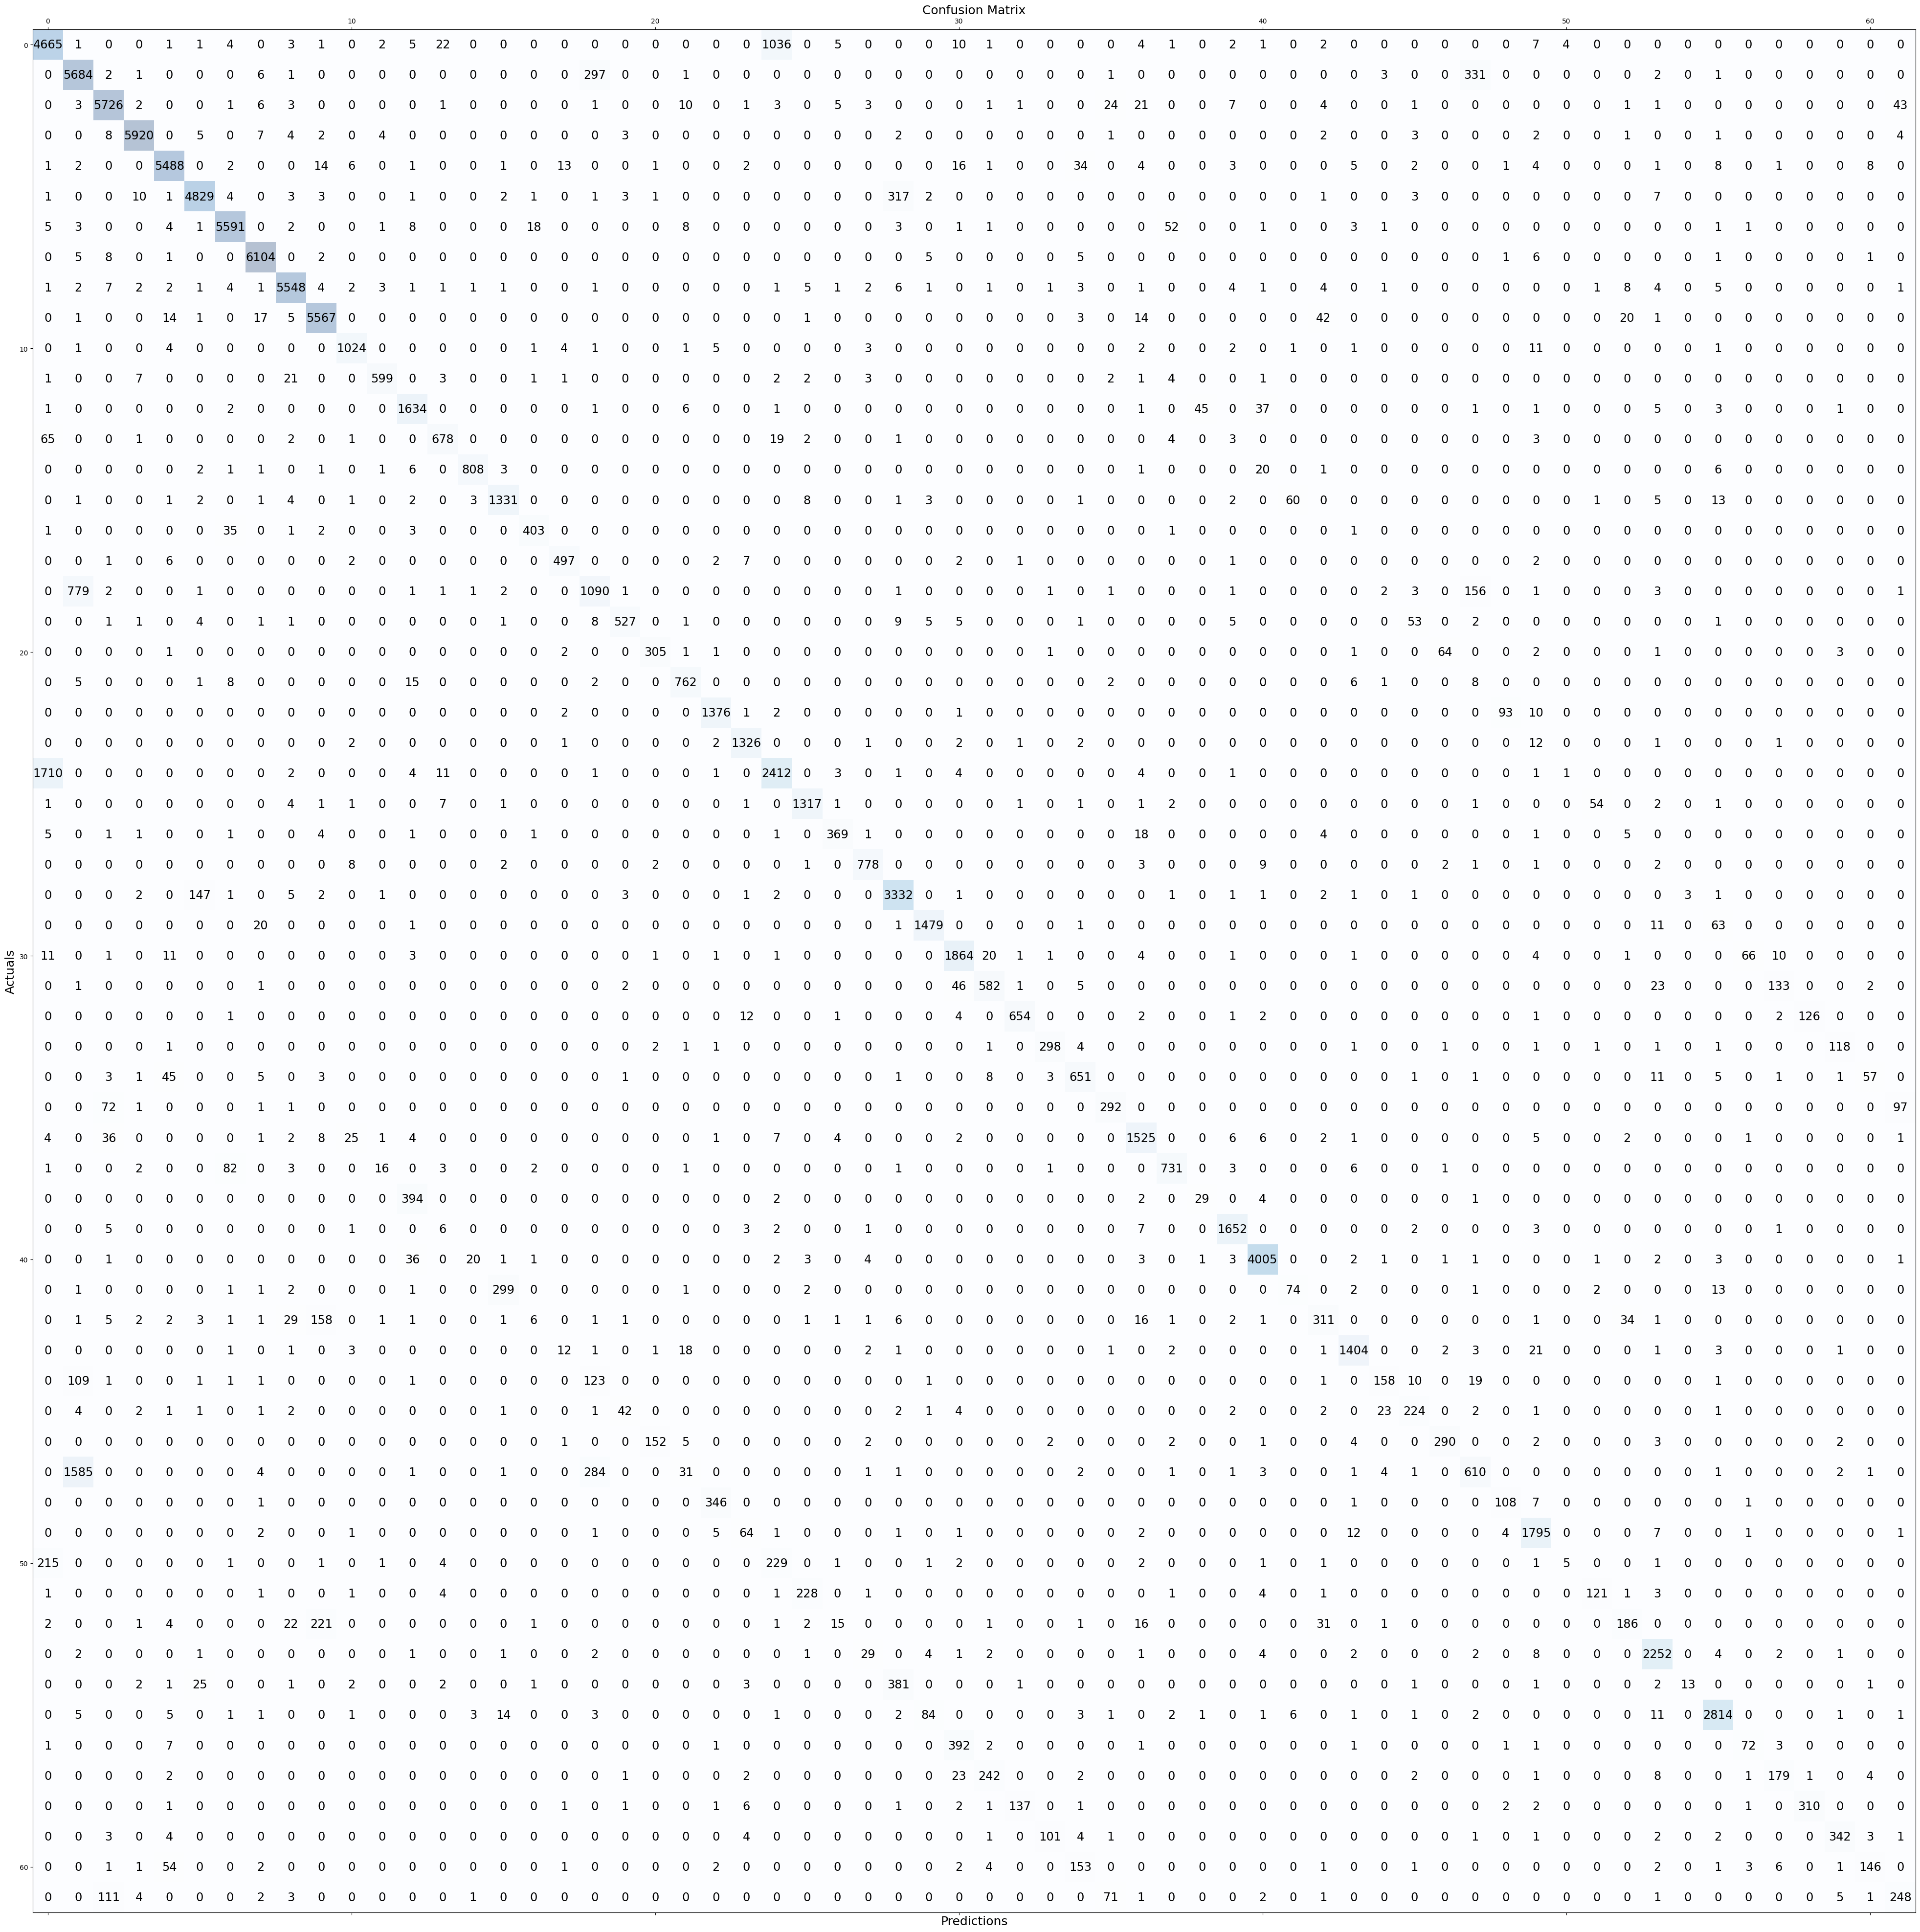

In [ ]:
from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(model, X_test, y_test)  
fig, ax = plt.subplots(figsize=(50, 50))
ax.matshow(CM, cmap=plt.cm.Blues, alpha=0.3)
for i in range(CM.shape[0]):
    for j in range(CM.shape[1]):
        ax.text(x=j, y=i,s=CM[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
 

## Saving the model

In [ ]:
model_json = model.to_json();
with open("model6.json", "w") as json_file:
    json_file.write(model_json);

#saves the model info as json file

model.save_weights("model6.h5")
#Creates a HDF5 file 'model.h5'